# Alternative time series project

**Objetivo de la tarea:** Crear un modelo de series temporales para detección de anomalías en el uso de la CPU

## Step 1: Importar librerías

In [1]:
! pip install pandas
! pip install matplotlib
! pip install statsmodels
! pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 117.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 120.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 503.5/503.5 kB 90.1 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 134.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 151.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 944.1/944.1 kB 131.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 163.6 MB/s eta 0:00:00

[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 90.8 MB/s eta 0:00:00:00:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 44.1 MB/s eta 0:00:0000:0100:01
     ━━━━

In [2]:
# importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima.arima import auto_arima

## Step 2: Cargar datos

In [3]:
# cargo datos
cpu_train_a = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-a.csv', index_col = 0)
cpu_train_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-train-b.csv', index_col = 0)
cpu_test_a = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-a.csv', index_col = 0)
cpu_test_b = pd.read_csv('https://raw.githubusercontent.com/oreilly-mlsec/book-resources/master/chapter3/datasets/cpu-utilization/cpu-test-b.csv', index_col = 0)

In [4]:
cpu_train_a

,cpu
datetime,
2017-01-27 18:42:00,1.14
2017-01-27 18:43:00,1.10
2017-01-27 18:44:00,1.09
2017-01-27 18:45:00,1.08
2017-01-27 18:46:00,1.08
...,...
2017-01-28 01:37:00,2.41
2017-01-28 01:38:00,2.16
2017-01-28 01:39:00,1.93


In [5]:
cpu_train_b

,cpu
datetime,
2017-01-27 18:42:00,1.14
2017-01-27 18:43:00,1.10
2017-01-27 18:44:00,1.09
2017-01-27 18:45:00,1.08
2017-01-27 18:46:00,1.08
...,...
2017-01-28 04:37:00,1.45
2017-01-28 04:38:00,1.78
2017-01-28 04:39:00,1.77


In [6]:
cpu_test_a

,cpu
datetime,
2017-01-28 01:42:00,2.19
2017-01-28 01:43:00,1.97
2017-01-28 01:44:00,2.15
2017-01-28 01:45:00,1.94
2017-01-28 01:46:00,1.81
2017-01-28 01:47:00,1.67
2017-01-28 01:48:00,1.61
2017-01-28 01:49:00,1.58
2017-01-28 01:50:00,1.92


In [7]:
cpu_test_b

,cpu
datetime,
2017-01-28 04:42:00,1.71
2017-01-28 04:43:00,1.58
2017-01-28 04:44:00,1.86
2017-01-28 04:45:00,1.66
2017-01-28 04:46:00,1.61
2017-01-28 04:47:00,1.52
2017-01-28 04:48:00,1.43
2017-01-28 04:49:00,1.34
2017-01-28 04:50:00,1.30


* `cpu_train_a` tiene 420 filas
* `cpu_train_b` tiene 600 filas
* `cpu_test_a` tiene 60 filas
* `cpu_test_b` tiene 60 filas

In [8]:
# convierto índice a fecha
cpu_train_a.index = pd.to_datetime(cpu_train_a.index)
cpu_train_b.index = pd.to_datetime(cpu_train_b.index)
cpu_test_a.index = pd.to_datetime(cpu_test_a.index)
cpu_test_b.index = pd.to_datetime(cpu_test_b.index)

In [9]:
# uno train y test (para graficar más adelante)
cpu_a = pd.concat([cpu_train_a, cpu_test_a], axis = 0)
cpu_b = pd.concat([cpu_train_b, cpu_test_b], axis = 0)

In [10]:
cpu_a.head()

,cpu
datetime,
2017-01-27 18:42:00,1.14
2017-01-27 18:43:00,1.10
2017-01-27 18:44:00,1.09
2017-01-27 18:45:00,1.08
2017-01-27 18:46:00,1.08


In [11]:
cpu_b.head()

,cpu
datetime,
2017-01-27 18:42:00,1.14
2017-01-27 18:43:00,1.10
2017-01-27 18:44:00,1.09
2017-01-27 18:45:00,1.08
2017-01-27 18:46:00,1.08


## Step 3: Visualizar los datos

<AxesSubplot:xlabel='datetime'>

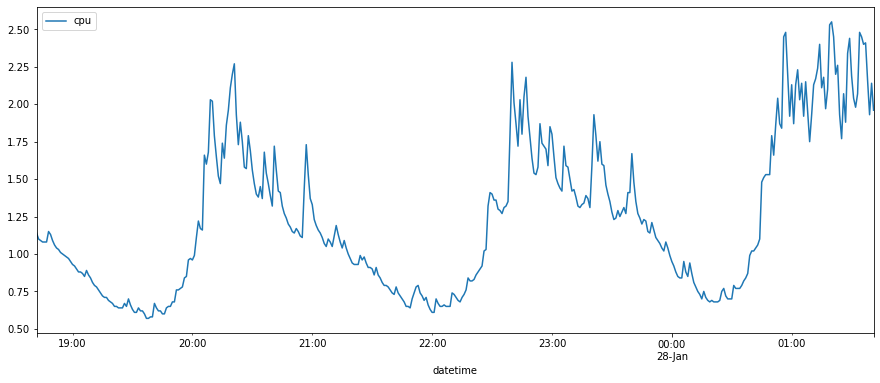

In [12]:
cpu_train_a.plot(figsize=(15,6))

Se puede apreciar que la serie tiene una marcada estacionalidad, repite un ciclo cada 2 horas aprox. No parece presentar tendencia, no se ve claramente si los últimos valores siguen el ciclo o pueden representar una tendencia creciente

Realizo la descomposición de la serie en tendencia, estacionalidad y residuos. Utilizo un modelo aditivo porque no veo crecimiento exponencial

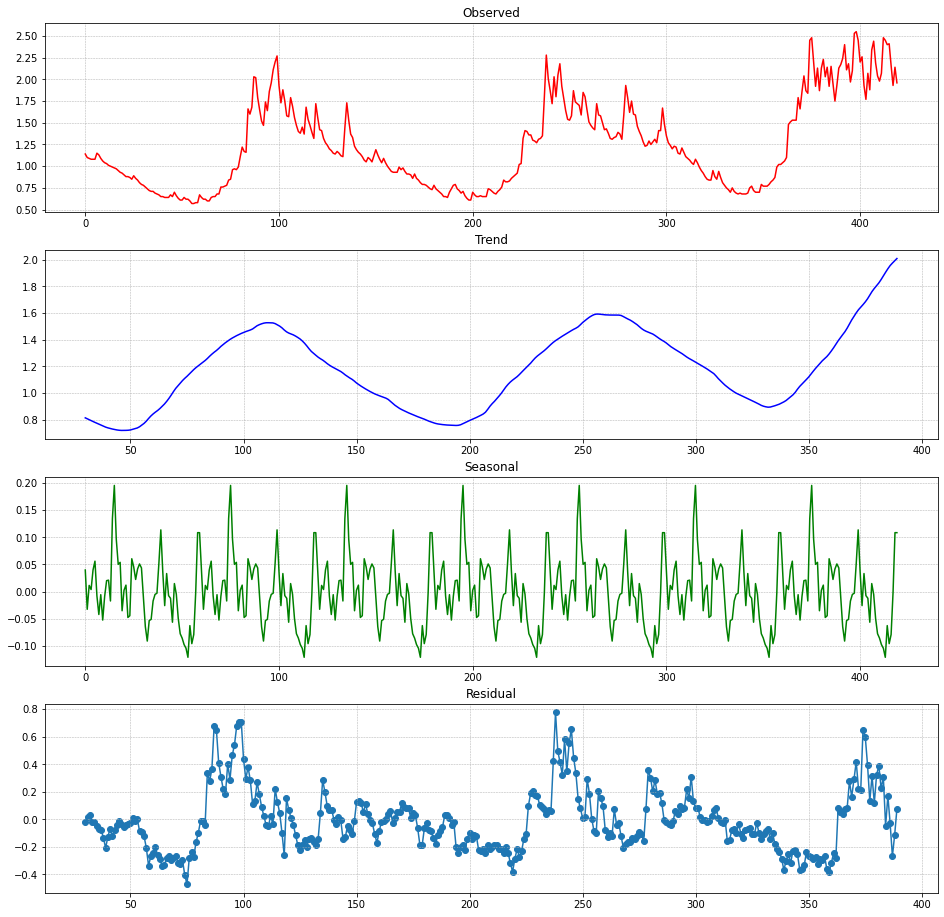

In [13]:
### descomposicion de la serie
descomp = sm.tsa.seasonal_decompose(cpu_train_a['cpu'].values, period = 60, model = 'additive') 

descomp_observed = descomp.observed
descomp_trend = descomp.trend
descomp_seasonal = descomp.seasonal
descomp_residual = descomp.resid

fig,ax = plt.subplots(4, figsize = (16,16))

ax[0].set_title('Observed')
ax[0].plot(descomp_observed, c = 'r')
ax[0].grid(linestyle = '--', linewidth = 0.5)

ax[1].set_title('Trend')
ax[1].plot(descomp_trend, c = 'b')
ax[1].grid(linestyle = '--', linewidth = 0.5)

ax[2].set_title('Seasonal')
ax[2].plot(descomp_seasonal, c = 'g')
ax[2].grid(linestyle = '--', linewidth = 0.5)

ax[3].set_title('Residual')
ax[3].plot(descomp_residual)
ax[3].scatter(y = descomp_residual, x = range(len(descomp_residual)))
ax[3].grid(linestyle = '--', linewidth = 0.5)

fig.show()

Al descomponer la serie se confirma que la misma presenta ciclo y estacionalidad, y tal vez una leve tendencia creciente. El ciclo se repite cada 4 hs aprox (240 min aprox).

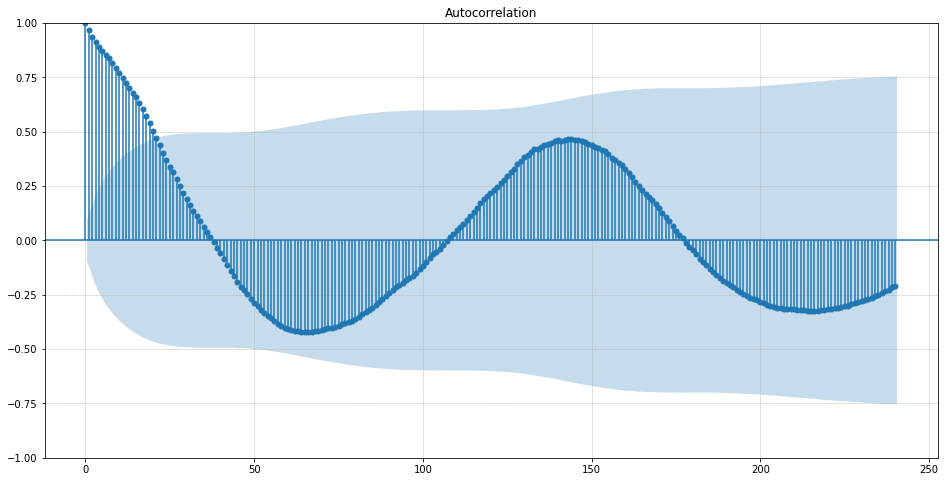

In [14]:
# Estimo función de autocorrelación para tener otro diagnóstico de la serie
fig, ax = plt.subplots(1, 1, figsize = (16, 8))
plot_acf(cpu_train_a['cpu'].values, lags = 240, ax = ax)
plt.grid(linestyle = '--', linewidth = 0.5)
fig.show()

El ACF indica que la serie tiene un comportamiento sinusoidal que habría que considerar en el mnodelo ARIMA, sospecho que la serie requiera uno o dos rezagos para la parte estacional y uno para la parte regular.

In [15]:
# rezago simple
cpu_train_a_lag = cpu_train_a.copy() 
cpu_train_a_lag['dif'] = cpu_train_a_lag.diff(periods = 1)
cpu_train_a_lag = cpu_train_a_lag.dropna(how = 'any', axis = 0) # para eliminar las filas que no tiene contr qué rezagar 

In [16]:
# miro serie
cpu_train_a_lag

,cpu,dif
datetime,,
2017-01-27 18:43:00,1.10,-0.04
2017-01-27 18:44:00,1.09,-0.01
2017-01-27 18:45:00,1.08,-0.01
2017-01-27 18:46:00,1.08,0.00
2017-01-27 18:47:00,1.08,0.00
...,...,...
2017-01-28 01:37:00,2.41,0.01
2017-01-28 01:38:00,2.16,-0.25
2017-01-28 01:39:00,1.93,-0.23


<AxesSubplot:xlabel='datetime'>

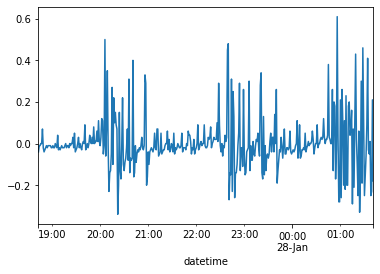

In [17]:
# grafico
cpu_train_a_lag['dif'].plot()

In [18]:
# agrego rezago estacional
cpu_train_a_lag['dif_s'] = cpu_train_a_lag['dif'].diff(periods = 60)
cpu_train_a_lag = cpu_train_a_lag.dropna(how = 'any', axis = 0) # para eliminar las filas que no tiene contr qué rezagar 

<AxesSubplot:xlabel='datetime'>

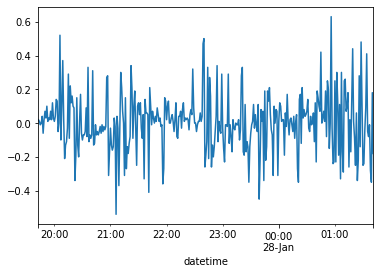

In [19]:
# miro serie
cpu_train_a_lag['dif_s'].plot()

Aplicando un rezago simple (y_t - t_(t-1)) y uno estacional (y_t - y_(t-60)) la serie se se estacionaria

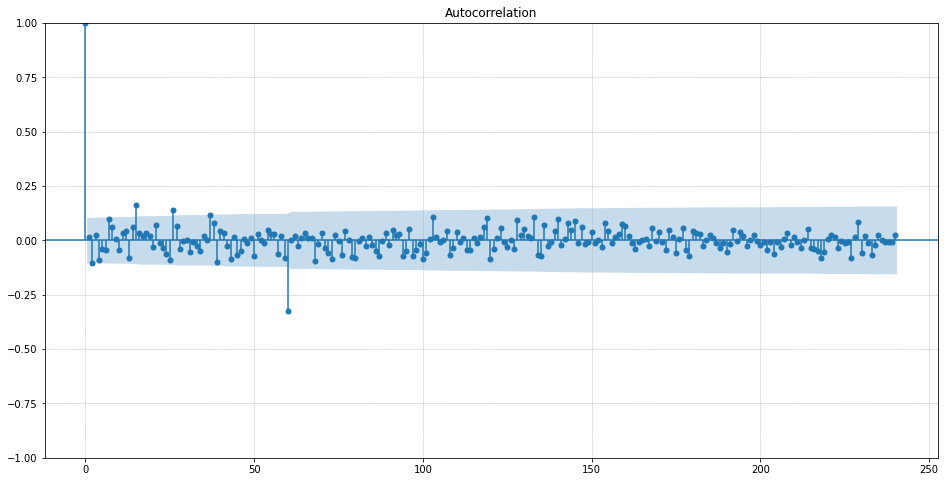

In [20]:
# función de autocorrelación de la serie desestacionalizada
fig, ax = plt.subplots(1, 1, figsize = (16, 8))
plot_acf(cpu_train_a_lag['dif_s'].values, lags = 240, ax = ax)
plt.grid(linestyle = '--', linewidth = 0.5)
fig.show()

Al quitarle la estacionalidad, no queda mucha estructura por recoger, pruebo distintos valores de m para captar la estructura estacional remanente

## Step 4: Ajustar modelo ARIMA

Probé con m=1 a m=6, la opción que me parece ajusta mejor es m=4

In [21]:
# m puede ser igual a 2 (2 períodos de 60 min en cada estación)
stepwise_model = auto_arima(cpu_train_a, start_p = 0, start_q = 0,
                           max_p = 6, max_q = 6, m = 4,
                           start_P = 0, seasonal = True,
                           d = 1, D = 1, trace = True,
                           error_action = 'ignore',  
                           suppress_warnings = True, 
                           stepwise = True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[4]             : AIC=inf, Time=0.16 sec
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=-219.541, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=-372.373, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=0.31 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=-217.560, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[4]             : AIC=-428.919, Time=0.29 sec
 ARIMA(1,1,0)(2,1,1)[4]             : AIC=inf, Time=1.65 sec
 ARIMA(1,1,0)(1,1,1)[4]             : AIC=inf, Time=0.40 sec
 ARIMA(0,1,0)(2,1,0)[4]             : AIC=-430.366, Time=0.10 sec
 ARIMA(0,1,0)(1,1,0)[4]             : AIC=-371.810, Time=0.04 sec
 ARIMA(0,1,0)(2,1,1)[4]             : AIC=inf, Time=0.88 sec
 ARIMA(0,1,0)(1,1,1)[4]             : AIC=inf, Time=0.29 sec
 ARIMA(0,1,1)(2,1,0)[4]             : AIC=-429.150, Time=0.19 sec
 ARIMA(1,1,1)(2,1,0)[4]             : AIC=inf, Time=1.22 sec
 ARIMA(0,1,0)(2,1,0)[4] intercept   : AIC=-428.373, Time=0.41 sec

B

In [22]:
stepwise_model.fit(cpu_train_a)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 4),
      suppress_warnings=True, with_intercept=False)

## Step 5: Evaluar performance del modelo ajustado

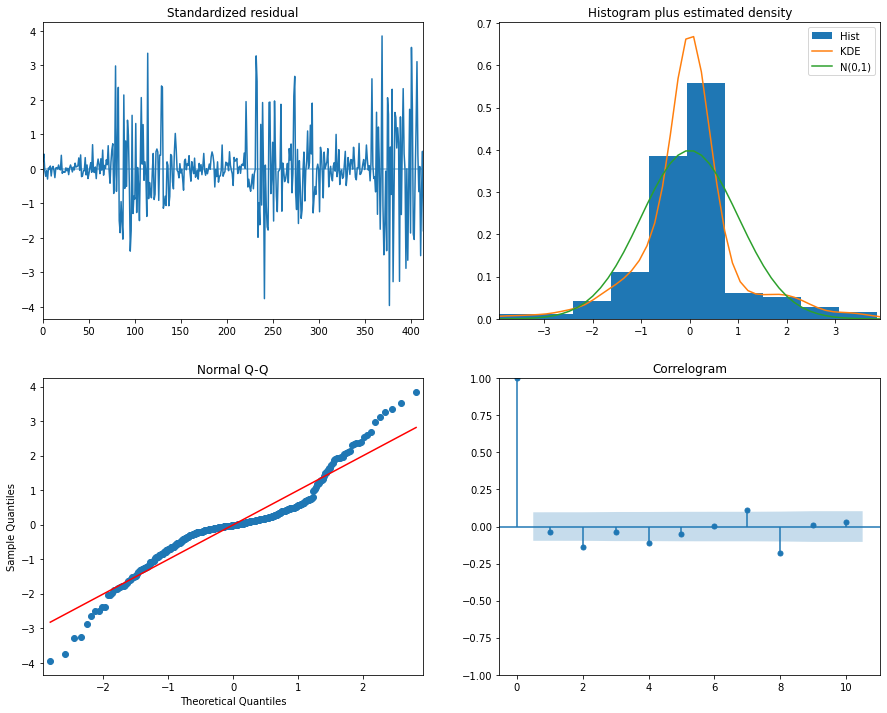

In [23]:
stepwise_model.fit(cpu_train_a).plot_diagnostics(figsize = (15, 12))
plt.show()

El modelo podría seguir mejorándose, los residuos muestran que aún no se captó toda la estacionalidad pero decido terminarlo acá por falta de tiempo ya que debo avanzar con otras tareas

## Step 6: Predicciones

Ejecute la predicción real utilizando los 100 puntos de datos observados más recientes seguidos de los 60 puntos predichos.

In [24]:
# predicción de cpu_a
pred_a = stepwise_model.predict(n_periods = 60)

In [25]:
pred_a

array([ 1.97051116,  1.84947408,  1.85553047,  1.85184411,  1.90943684,
        1.77955242,  1.84507291,  1.77692895,  1.70051318,  1.53655237,
        1.63281776,  1.54814192,  1.55724065,  1.42283748,  1.47311634,
        1.42535731,  1.41889975,  1.27452543,  1.34867527,  1.27869518,
        1.25212595,  1.10433752,  1.17736405,  1.11064031,  1.10539391,
        0.96397592,  1.02890973,  0.9680172 ,  0.9538999 ,  0.80885804,
        0.88044449,  0.81384018,  0.79855173,  0.65390961,  0.72341056,
        0.65901596,  0.64795807,  0.50436803,  0.57297833,  0.50902568,
        0.49514988,  0.35059977,  0.42067843,  0.3555563 ,  0.34226267,
        0.19805698,  0.26733927,  0.20295176,  0.19026731,  0.04615669,
        0.11550115,  0.05098686,  0.0376149 , -0.10669816, -0.03710273,
       -0.10179507, -0.11486627, -0.25905913, -0.18968027, -0.25418794])

In [26]:
cpu_a

,cpu
datetime,
2017-01-27 18:42:00,1.14
2017-01-27 18:43:00,1.10
2017-01-27 18:44:00,1.09
2017-01-27 18:45:00,1.08
2017-01-27 18:46:00,1.08
...,...
2017-01-28 02:37:00,0.73
2017-01-28 02:38:00,0.71
2017-01-28 02:39:00,0.69


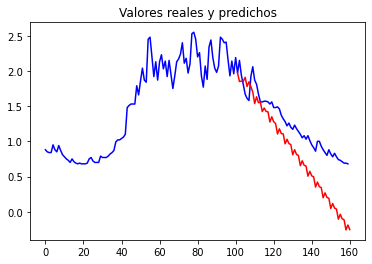

In [27]:
plt.plot(cpu_a['cpu'].values[-160:], c = 'b')
plt.plot(range(101, 161), pred_a, c = 'r')
plt.title('Valores reales y predichos')
plt.show()

## Step 7:

Realicemos la misma detección de anomalías en otro segmento del conjunto de datos de uso de la CPU capturado en un momento diferente mediante el uso de cpu-train-b

¿Puedes visualizar alguna anomalía que ocurra poco tiempo después del período de entrenamiento?

In [28]:
# ajusto el mismo modelo con otros datos (train_b)
stepwise_model.fit(cpu_train_b)

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 4),
      suppress_warnings=True, with_intercept=False)

In [29]:
# predigo 60 obs con nuevo modelo
pred_b = stepwise_model.predict(n_periods = 60)

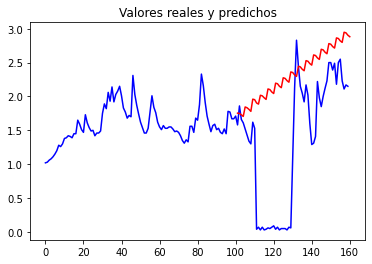

In [30]:
# comparo
plt.plot(cpu_b['cpu'].values[-160:], c = 'b')
plt.plot(range(101, 161), pred_b, c = 'r')
plt.title('Valores reales y predichos')
plt.show()

En este caso el modelo predice un aumento (tendencia creciente), sin embargo se produce una caída abrupta. El modelo no pudo captarlo